## Exercise 2: Train classifier on CIFAR-10 data. (30 points)
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data as it passes through the layers of your network.

### Task 1: Create data loaders and plot images
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


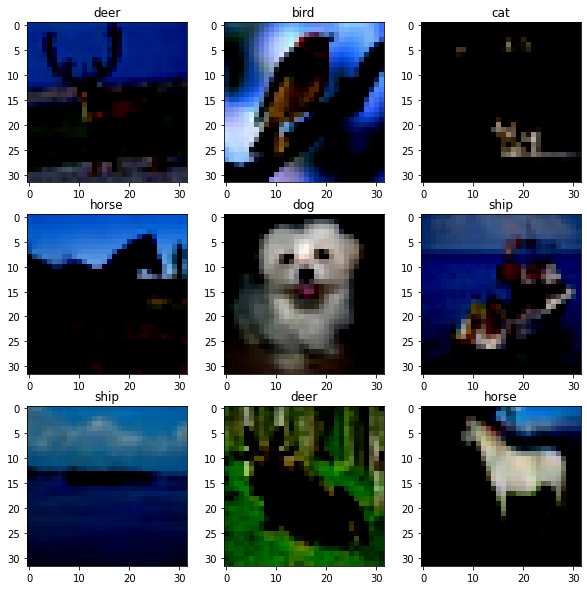

In [ ]:
import matplotlib.pyplot as plt
import random as random
import torchvision

train_batch_size, test_batch_size = 100, 1000
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, test_batch_size, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, grid = plt.subplots(3,3, figsize=(10, 10))
for row in range(3):
  for col in range(3):
    random_idx = random.randint(0, len(test_dataset))
    img, label = test_dataset[random_idx]
    grid[row][col].imshow(img.permute(1,2,0))
    grid[row][col].set_title(f'{classes[label]}')
fig.show()

### Task 2: Create CNN and train it
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be **above** 50%



In [ ]:
import torch.optim as optim
import torch.nn.functional as F

class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()
    self.conv_layer1 = nn.Conv2d(3, 22, kernel_size=5)
    self.conv_layer2 = nn.Conv2d(22, 7, kernel_size=3)
    self.fc_layer1 = nn.Linear(252, 10)

  def forward(self, x):
    x = self.conv_layer1(x) # Now x will have shape: batchsize x 22 X 28 X 28
    x = F.relu(F.max_pool2d(x, 2)) # Now x will have shape: batchsize x 22 x 14 x 14
    x = self.conv_layer2(x) # Now x will have shape: batchsize x 7 x 12 x 12
    x = F.relu(F.max_pool2d(x, 2)) # Now x will have shape: batchsize x 7 x 6 x 6
    x = x.view(-1, 252)
    return F.log_softmax(self.fc_layer1(x), -1) # Now x wil have shape: batchsize x 10

cnn_classifier = CNN()
optimizer = optim.SGD(cnn_classifier.parameters(), lr = 0.01, momentum = 0.8)

In [ ]:
incorrect_idx = []
incorrect_prediction = []

def train(classifier, epoch):
  classifier = classifier.to(device)
  classifier.train()
  for batch_idx, (images, targets) in enumerate(train_loader):
    images = images.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    outputs = classifier(images)
    loss = F.nll_loss(outputs, targets)
    loss.backward()
    optimizer.step()

    if batch_idx%100 == 0:
      print(f'EPOCH: {epoch} [{batch_idx*len(images)}/{len(train_dataset)}] Loss: {loss.item()}')
    
def test(classifier, epoch):
  total_loss, correct = 0, 0
  classifier = classifier.to(device)
  classifier.eval()
  with torch.no_grad():
    for images, targets in test_loader:
      images = images.to(device)
      targets = targets.to(device)
      incorrect_idx.clear()
      incorrect_prediction.clear()
      outputs = classifier(images)
      total_loss += F.nll_loss(outputs, targets, reduce='sum').item()
      prediction = outputs.data.max(1, keepdim=True)[1]
      prediction_status = prediction.eq(targets.data.view_as(prediction))
      correct += prediction_status.sum()
      for i, x in enumerate(prediction_status):
        if not x.item():
          incorrect_idx.append(i)
          incorrect_prediction.append(prediction[i].item())

  total_loss /= len(test_dataset)
  print(f'Testing Loss for Epoch: {epoch} is {total_loss} and testing accuracy is {100.*(correct/len(test_dataset))}%')

In [ ]:
max_epochs = 3

for i in range(1, max_epochs+1):
  train(cnn_classifier, i)
  test(cnn_classifier, i)

EPOCH: 1 [0/50000] Loss: 2.3064866065979004
EPOCH: 1 [10000/50000] Loss: 1.9194811582565308
EPOCH: 1 [20000/50000] Loss: 1.8743749856948853
EPOCH: 1 [30000/50000] Loss: 1.7322887182235718
EPOCH: 1 [40000/50000] Loss: 1.5982404947280884


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Testing Loss for Epoch: 1 is 0.0015760289192199707 and testing accuracy is 42.529998779296875%
EPOCH: 2 [0/50000] Loss: 1.8955093622207642
EPOCH: 2 [10000/50000] Loss: 1.5438874959945679
EPOCH: 2 [20000/50000] Loss: 1.541355013847351
EPOCH: 2 [30000/50000] Loss: 1.6014800071716309
EPOCH: 2 [40000/50000] Loss: 1.415518045425415
Testing Loss for Epoch: 2 is 0.0014223339676856994 and testing accuracy is 48.64999771118164%
EPOCH: 3 [0/50000] Loss: 1.360201358795166
EPOCH: 3 [10000/50000] Loss: 1.229414939880371
EPOCH: 3 [20000/50000] Loss: 1.3896396160125732
EPOCH: 3 [30000/50000] Loss: 1.3897796869277954
EPOCH: 3 [40000/50000] Loss: 1.56754469871521
Testing Loss for Epoch: 3 is 0.001329917550086975 and testing accuracy is 52.23999786376953%


### Task 3: Plot misclassified test images
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


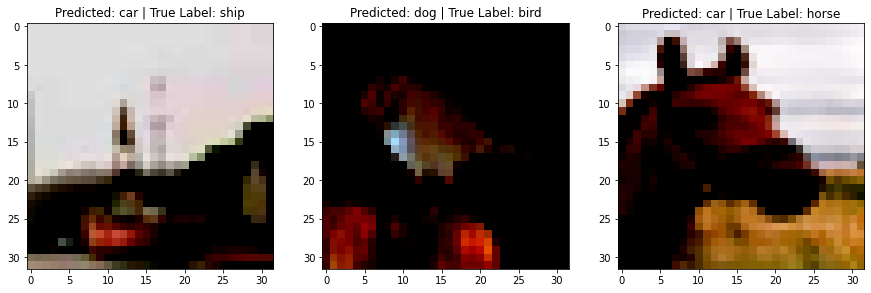

In [ ]:
import matplotlib.pyplot as plt
import random as random

fig, ax = plt.subplots(1, 3, figsize=(15, 20))
for i in range(3):
  random_idx = random.randint(0, len(incorrect_idx))
  random_test_idx = incorrect_idx[random_idx]
  img, label = test_dataset[random_test_idx]
  ax[i].imshow(img.permute(1, 2, 0))
  ax[i].set_title(f'Predicted: {classes[incorrect_prediction[random_idx]]} | True Label: {classes[label]}')

Questions (0 points): Are the mis-classified images also misleading to human eyes?
They are more like unclear to figure out something useful from the images.